# Clustering Crypto

In [63]:
# Initial imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from pathlib import Path
import plotly.express as px

### Fetching Cryptocurrency Data

In [64]:
# Use the following endpoint to fetch json data
url = "https://min-api.cryptocompare.com/data/all/coinlist"

In [65]:
# Create a DataFrame 
# HINT: You will need to use the 'Data' key from the json response, then transpose the DataFrame.

In [66]:
# Alternatively, use the provided csv file:
df = pd.read_csv(
    Path("Resources/crypto_data.csv"),
    index_col=0
)
df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


### Data Preprocessing

In [67]:
# Keep only necessary columns:
# 'CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply'


In [68]:
# Keep only cryptocurrencies that are trading
df.drop(df[df['IsTrading'] == False].index, inplace=True)
df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [69]:
# Keep only cryptocurrencies with a working algorithm


In [70]:
# Remove the "IsTrading" column
new_df = df.drop(['IsTrading'], axis=1)
new_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [71]:
# Remove rows with at least 1 null value
new_df.dropna()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [72]:
# Remove rows with cryptocurrencies having no coins mined
new_df[new_df!=0].dropna()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [73]:
# Drop rows where there are 'N/A' text values
new_df.dropna()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [74]:
# Store the 'CoinName'column in its own DataFrame prior to dropping it from crypto_df
coin_name = new_df["CoinName"]

In [75]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm
clustering_df = new_df.drop(columns="CoinName", axis=1)
clustering_df.dropna(inplace=True)
clustering_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
808,SHA-256,PoW/PoS,0.000000e+00,0
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000


In [76]:
# Create dummy variables for text features
dummies = pd.get_dummies(clustering_df[['Algorithm', 'ProofType']], drop_first=True)
X = pd.concat([clustering_df.drop(['Algorithm', 'ProofType'],axis=1), dummies],axis=1)
X.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
808,0.000000e+00,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# Standardize data
data_scaler = StandardScaler()
data_scaler.fit_transform(X)

array([[-0.10282804, -0.03823841, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       [-0.07661326, -0.03823825, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       [-0.10282804, -0.03823841, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       ...,
       [-0.0784756 , -0.03823801, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       [-0.10264677, -0.0382384 , -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       [-0.10282485, -0.03823841, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596]])

### Reducing Dimensions Using PCA

In [78]:
# Use PCA to reduce dimensions to 3 principal components
pca = PCA(n_components=3)
crypto_pca = pca.fit_transform(X)

In [79]:
# Create a DataFrame with the principal components data
pcs_df = pd.DataFrame(
    data=crypto_pca, columns=["PC 1", "PC 2", "PC 3"], index=X.index
)
pcs_df.head()

,PC 1,PC 2,PC 3
42,-1.346564e+14,-4.145018e+09,0.806588
404,-1.346558e+14,-3.089833e+09,0.806805
808,-1.346564e+14,-4.145018e+09,0.666790
1337,-1.343422e+14,2.513442e+10,0.776958
BTC,-1.346564e+14,-4.127091e+09,-0.723496


### Clustering Crytocurrencies Using K-Means

#### Find the Best Value for `k` Using the Elbow Curve

In [80]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

C:\Users\Kade\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


:Curve   [k]   (inertia)

Running K-Means with `k=<your best value for k here>`

In [81]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=0)
# Fit the model
model.fit(pcs_df)
# Predict clusters
predictions = model.predict(pcs_df)
# Create a new DataFrame including predicted clusters and cryptocurrencies features
pcs_df["class"] = model.labels_
clustered_df = pd.concat([new_df, pcs_df], axis=1)
clustered_df.dropna(inplace=True)
clustered_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,class
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42,-1.346564e+14,-4.145018e+09,0.806588,0.0
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000,-1.346558e+14,-3.089833e+09,0.806805,0.0
808,808,SHA-256,PoW/PoS,0.000000e+00,0,-1.346564e+14,-4.145018e+09,0.666790,0.0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359,-1.343422e+14,2.513442e+10,0.776958,0.0
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000,-1.346564e+14,-4.127091e+09,-0.723496,0.0
...,...,...,...,...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000,-1.346544e+14,-2.145018e+09,0.010428,0.0
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000,-1.346561e+14,-4.130087e+09,0.806591,0.0
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610,-1.346550e+14,-3.164795e+09,-0.726455,0.0
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000,-1.346564e+14,-4.137721e+09,-0.704218,0.0


### Visualizing Results

#### Scatter Plot with Tradable Cryptocurrencies

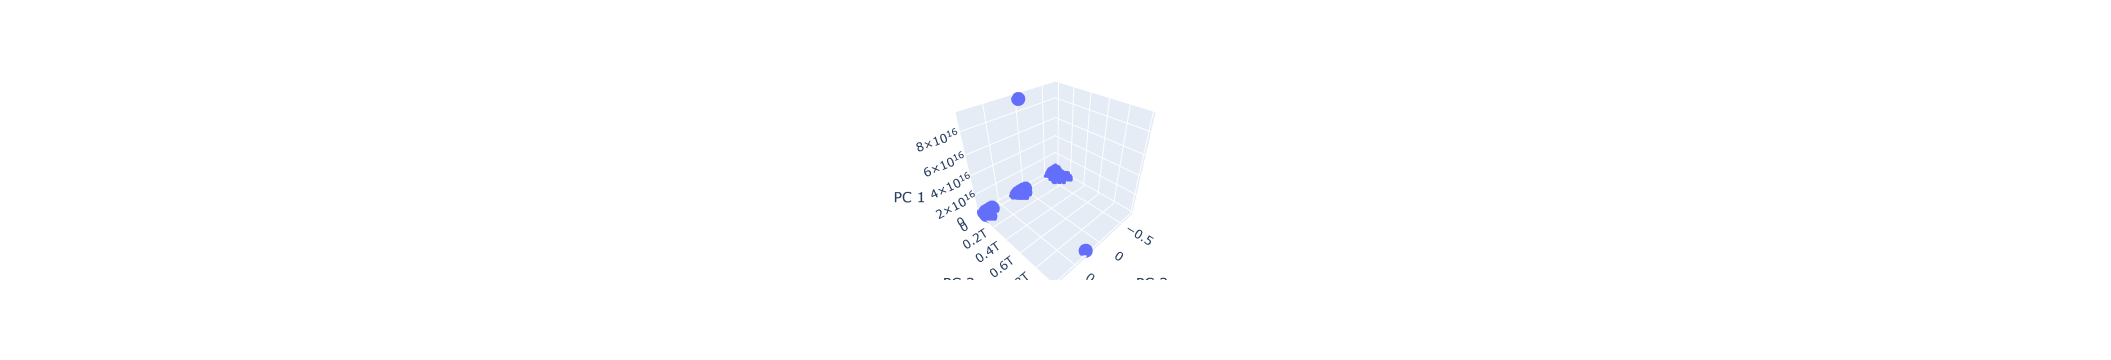

In [85]:
# Scale data to create the scatter plot
fig = px.scatter_3d(
    clustered_df,
    x="PC 3",
    y="PC 2",
    z="PC 1",
    hover_name="CoinName",
    hover_data=["Algorithm"],
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [ ]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"


#### Table of Tradable Cryptocurrencies

In [87]:
# Table with tradable cryptos
clustered_df.hvplot.table(columns=["CoinName", "Algorithm", "ProofType", "TotalCoinSupply", "TotalCoinsMined", "class"])

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,class]

In [88]:
# Print the total number of tradable cryptocurrencies
count= clustered_df['CoinName'].count()
print(f'There are {count} tradable cryptocurrencies')

There are 685 tradable cryptocurrencies
